Robust least squares

$$ \begin{equation}
f(A, \sigma, \omega;t) = A e^{-\sigma t} \sin (\omega t)
\end{equation}$$

In [142]:
# https://scipy-cookbook.readthedocs.io/items/robust_regression.html
# data generator
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 21
    return y + error

In [143]:
# model parameters:
A = 2
sigma = 0.1
omega = 0.1 * 2 * np.pi
x_true = np.array([A, sigma, omega])

noise = 0.1

t_min = 0
t_max = 30
Nsample = 128

In [144]:
# Data for fitting the parameters will contain n_outliers:

t_train = np.linspace(t_min, t_max, Nsample)
y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

In [145]:
# Define the function computing residuals for least-squares minimization:

def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

In [146]:
# Fix all ones as the initial estimate.

x0 = np.ones(3)

In [147]:
# Run standard least squares:

from scipy.optimize import least_squares

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

#  inlier residuals are approximately lower than 0.1.
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))


In [148]:
# Prediction error

t_test = np.linspace(t_min, t_max, 300)
y_test = generate_data(t_test, A, sigma, omega)

# compute predictions using the estimated parameter values

y_lsq = generate_data(t_test, *res_lsq.x)
y_robust = generate_data(t_test, *res_robust.x)

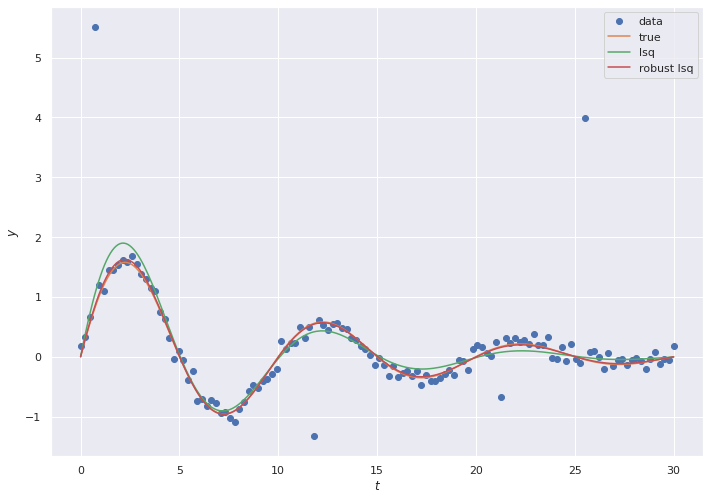

In [149]:
plt.figure(figsize=(11.69,8.27))
plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_lsq, label='lsq')
plt.plot(t_test, y_robust, label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();